In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)
m

545

In [4]:
housing.shape

(545, 13)

In [5]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

#We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape, df_test.shape

((436, 13), (109, 13))

In [6]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [7]:
df_Newtrain.shape, df_Newtest.shape

((436, 6), (109, 6))

In [8]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
m_scaler = MinMaxScaler()
s_scaler = StandardScaler()
#MinMax First
df_Newtrain[num_vars] = m_scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = m_scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(10), df_Newtest.head(10)

(         area  bedrooms  bathrooms   stories   parking     price
 542  0.124199       0.2        0.0  0.000000  0.000000  0.000000
 496  0.150654       0.2        0.0  0.000000  0.000000  0.081818
 484  0.083821       0.2        0.0  0.000000  0.000000  0.096970
 507  0.122807       0.2        0.0  0.000000  0.000000  0.072727
 252  0.558619       0.4        0.0  0.000000  0.000000  0.239394
 263  0.148427       0.4        0.0  0.333333  0.000000  0.230303
 240  0.139515       0.4        0.0  0.333333  0.333333  0.245455
 175  0.554442       0.6        0.5  0.333333  0.666667  0.303030
 385  0.125592       0.2        0.0  0.000000  0.000000  0.157576
 374  0.117238       0.2        0.5  0.000000  0.000000  0.163636,
          area  bedrooms  bathrooms   stories   parking     price
 239  0.203463      0.50   0.000000  0.333333  0.333333  0.270000
 113  0.690043      0.50   0.000000  0.000000  0.666667  0.412667
 325  0.156710      0.75   0.000000  0.333333  0.000000  0.215000
 66   1.0

In [9]:
Y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()
Y_Normtest = df_Newtest.pop('price')
X_Normtest = df_Newtest.copy()

In [10]:
X_Normtrain.head()

,area,bedrooms,bathrooms,stories,parking
542,0.124199,0.2,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,0.0


In [11]:
Y_Normtrain.head()

542    0.000000
496    0.081818
484    0.096970
507    0.072727
252    0.239394
Name: price, dtype: float64

In [12]:
#Y = Y_Normtrain.values
#Y_test = Y_Normtest.values

Y = df_train['price']
Y_test = df_test['price']
Y

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [13]:
X1 = df_Newtrain.values[:, 0] #Area values
X2 = df_Newtrain.values[:, 1] #Bedroom values
X3 = df_Newtrain.values[:, 2] #Bathroom values
X4 = df_Newtrain.values[:, 3] #Stories values
X5 = df_Newtrain.values[:, 4] #Parking values

X1_test = df_Newtest.values[:, 0] #Area values
X2_test = df_Newtest.values[:, 1] #Bedroom values
X3_test = df_Newtest.values[:, 2] #Bathroom values
X4_test = df_Newtest.values[:, 3] #Stories values
X5_test = df_Newtest.values[:, 4] #Parking values

In [14]:
m_train = len(Y_Normtrain)
m_test = len(Y_Normtest)
m_train, m_test

(436, 109)

In [15]:
X_0 = np.ones((m_train, 1))
X_0_test = np.ones((m_test, 1))

In [16]:
#Reshape function used to convert X from 1D to 2D array of m x 1
X_1 = X1.reshape(m_train, 1)
X_2 = X2.reshape(m_train, 1)
X_3 = X3.reshape(m_train, 1)
X_4 = X4.reshape(m_train, 1)
X_5 = X5.reshape(m_train, 1)

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)


In [17]:
#hstack() function from numpy to have X_0 to X_5 in one final Matrix
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))


In [18]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [19]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 *m) * np.sum(sqrErrors)
    
    return J

In [20]:
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 10587991986906.973


In [21]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, Y, theta)
        
    return theta, cost_history

In [22]:
theta = [0., 0., 0., 0., 0., 0.]
theta_test = [0., 0., 0., 0., 0., 0.]
iterations = 4000;
alpha = 0.003;

In [23]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
theta_test, cost_history_test = gradient_descent(X_test, Y_test, theta_test, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final value of theta test set =', theta_test)
print('cost_history test set =', cost_history_test)

Final value of theta = [2948129.72920817 1573270.81950637 1474484.7493093  1460369.22338214
 1470375.72590992 1361487.40389956]
cost_history = [1.05241741e+13 1.04607778e+13 1.03978004e+13 ... 7.75706711e+11
 7.75684880e+11 7.75663054e+11]
Final value of theta test set = [2994732.73851409 1219275.78153488 1530959.92931509  604315.11531448
 1073793.42835473  903888.90803644]
cost_history test set = [2.51477168e+12 2.51062634e+12 2.50648834e+12 ... 1.64494707e+11
 1.64487501e+11 1.64480302e+11]


Text(0.5, 1.0, 'Convergence of gradient descent')

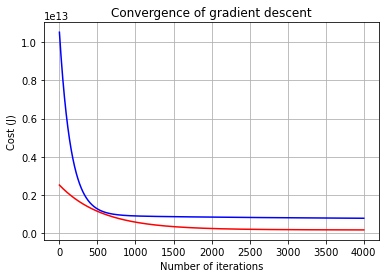

In [24]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.plot(range(1, iterations + 1), cost_history_test, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')